In [10]:
import os, io
import wave
import boto3, pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import soundfile as sf
#for loading and visualizing audio files
import librosa
import librosa.display
import boto3
from sagemaker import get_execution_role
bucket = 'koffeesay'
subfolder = 'recordings'
role = get_execution_role()
role
s3client = boto3.client('s3')
contents = s3client.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
files = [f['Key'] for f in contents if '._' not in f['Key']]
#print(files)
def get_every_n(a, n=2):
    for i in range(a.shape[0] // n):
        yield a[n*i:n*(i+1)]
        
my_bucket = bucket
for i,file in enumerate(files[10:11]):
    outfile = os.path.basename(file)+'.png'
    print(outfile)
    if not os.path.isfile(outfile):
        try:
            wav_file = file#s[-1]
            #if True:
            response = s3client.get_object(Bucket=my_bucket, Key=wav_file)
            body = response['Body']
            import numpy as np
            with io.BytesIO(body.read()) as bytesRead:
                y_stereo, sr = sf.read(bytesRead)
                print('read sound file..', outfile)
                #else:
                #    y, sr = sf.read('20210716123807.WAV')
                #print(y)
                y_mono = librosa.to_mono(y_stereo.T)
                print(y_mono)
                print(y_mono.shape)
                
                for j,y in enumerate(np.split(y_mono,60)):
                    print('y',y)
                    outfile = os.path.basename(file)+'_'+str(j)+'_60.png'
                    print('converted to mono..', outfile)
                    print(y.shape)
                    print(file)
                    print(sr)
                    S = librosa.feature.melspectrogram(y=y, sr=sr, 
                                                       n_mels=128,
                                                       fmax=8000
                                                      )
                    #plt.figure()
                    print('melspectrogram..', outfile)
                    fig, ax = plt.subplots()
                    S_dB = librosa.power_to_db(S, ref=np.max)
                    img = librosa.display.specshow(S_dB, x_axis='time',
                                             y_axis='mel', sr=sr,
                                             fmax=8000, 
                                                   ax=ax)
                    fig.colorbar(img, ax=ax, format='%+2.0f dB')
                    #ax.set(title='Mel-frequency spectrogram')
                    print('saving..', outfile)
                    plt.savefig(outfile)
                    #fig.show()
        except Exception as ex:
            print(ex)

20201116164937.WAV.png
read sound file.. 20201116164937.WAV.png
[-0.00408936 -0.00375366 -0.00283813 ... -0.00753784 -0.01329041
 -0.0098114 ]
(86109790,)
array split does not result in an equal division


sad.WAV.png
[[ 0.0007019   0.00115967]
 [ 0.0010376   0.00149536]
 [ 0.00195312  0.00241089]
 ...
 [-0.00537109 -0.00460815]
 [-0.00482178 -0.00415039]
 [-0.00366211 -0.00320435]]
[ 0.00093079  0.00126648  0.00218201 ... -0.00498962 -0.00448608
 -0.00343323]
(3612570,)
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. sad.WAV.png
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. sad.WAV.png
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. sad.WAV.png
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. sad.WAV.png
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. sad.WAV.png
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. sad.WAV.png
converted to mono.. sad.WAV.png
(180629,)
sad.WAV
24000
melspectrogram.. sad.WAV.png
saving.. 

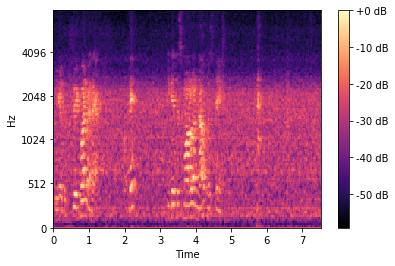

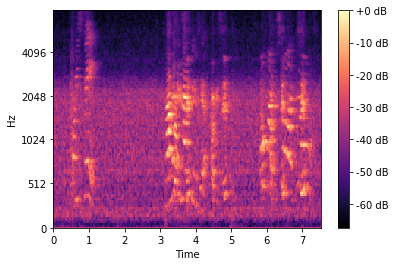

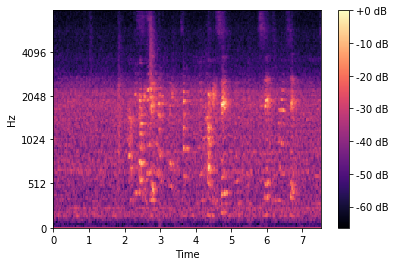

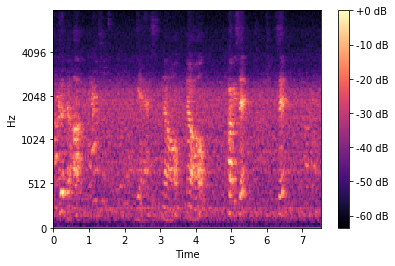

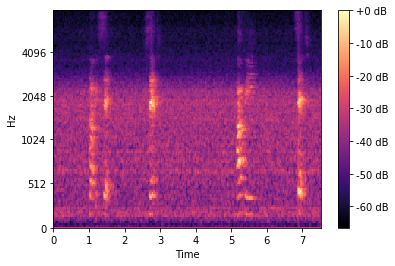

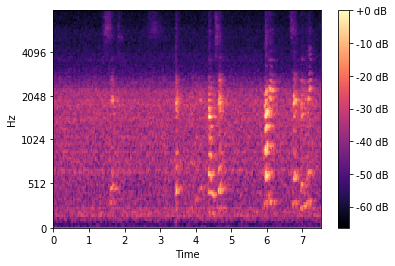

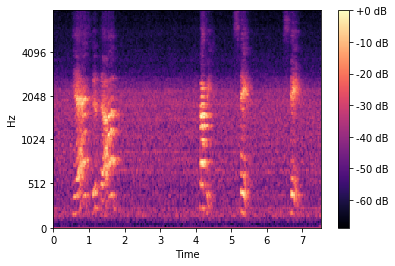

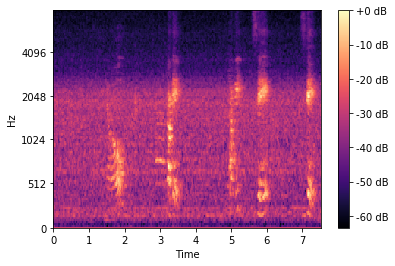

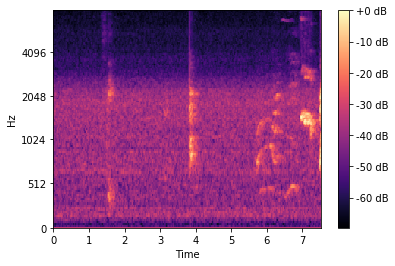

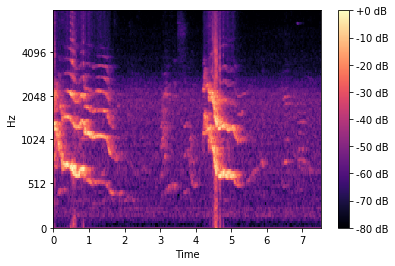

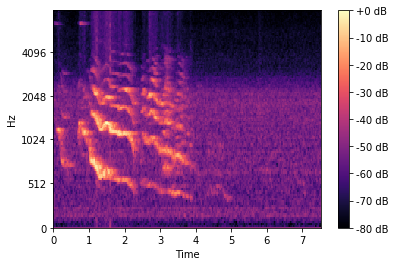

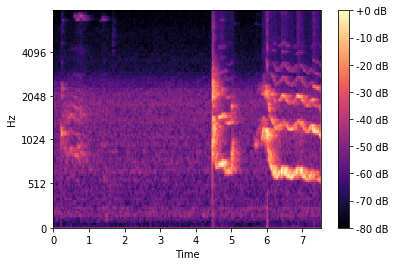

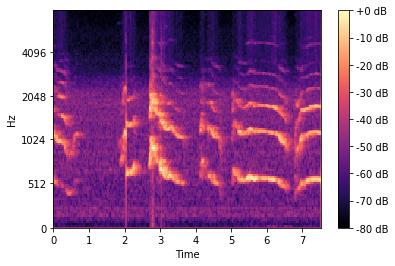

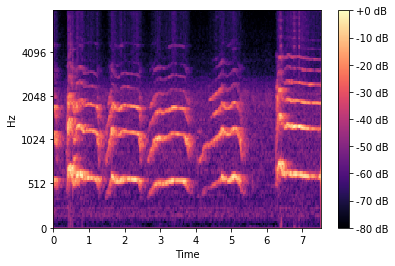

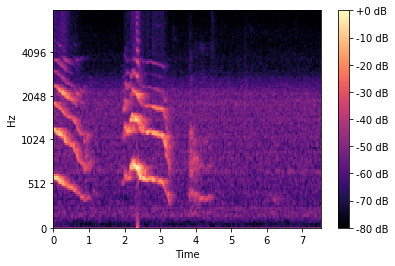

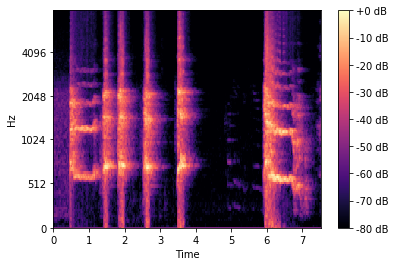

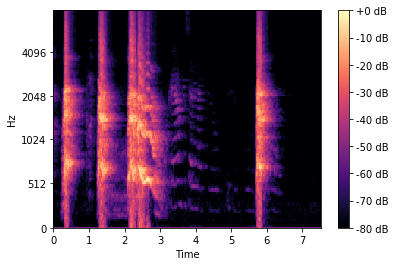

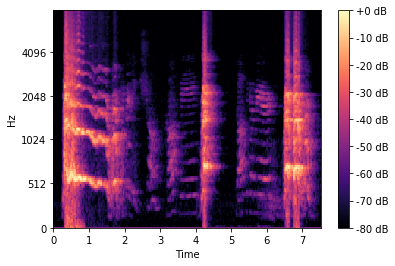

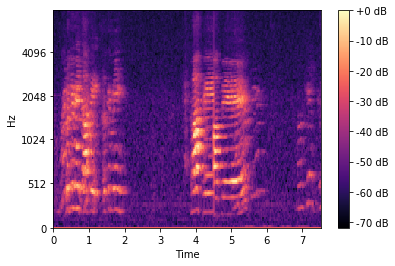

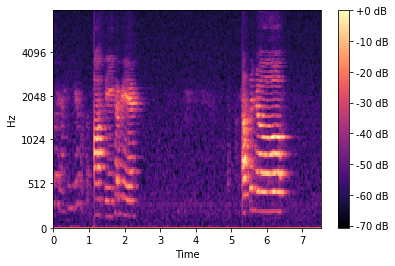

In [17]:
import os, io
import wave
import boto3, pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import soundfile as sf
#for loading and visualizing audio files
import librosa
import librosa.display
import boto3
from sagemaker import get_execution_role
bucket = 'koffeesay'
subfolder = 'recordings'
role = get_execution_role()
role
s3client = boto3.client('s3')
contents = s3client.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
files = ['sad.WAV']#, 'no_koffee.WAV']#[f['Key'] for f in contents if '._' not in f['Key']]

my_bucket = bucket
for i,file in enumerate(files):
    outfile = os.path.basename(file)+'.png'
    print(outfile)
    if os.path.isfile(outfile):
        try:
            wav_file = file#s[-1]
            import numpy as np
            y_stereo, sr = sf.read(file)
            print(y_stereo)
            y_mono = librosa.to_mono(y_stereo.T)
            print(y_mono)
            print(y_mono.shape)
            for y in np.array_split(y_mono,20):
            
                print('converted to mono..', outfile)
                print(y.shape)
                print(file)
                print(sr)
                S = librosa.feature.melspectrogram(y=y, sr=sr, 
                                                   n_mels=128,
                                                   fmax=8000
                                                  )
                #plt.figure()
                print('melspectrogram..', outfile)
                fig, ax = plt.subplots()
                S_dB = librosa.power_to_db(S, ref=np.max)
                img = librosa.display.specshow(S_dB, x_axis='time',
                                         y_axis='mel', sr=sr,
                                         fmax=8000, 
                                               ax=ax)
                fig.colorbar(img, ax=ax, format='%+2.0f dB')
                #ax.set(title='Mel-frequency spectrogram')
                print('saving..', outfile)
                plt.savefig(outfile)
                fig.show()
        except Exception as ex:
            print(ex)

[[-0.00213623 -0.00143433]
 [-0.00247192 -0.00177002]
 [-0.00167847 -0.00097656]
 ...
 [ 0.04681396  0.04672241]
 [ 0.04467773  0.04495239]
 [ 0.04141235  0.04226685]]
[-0.00178528 -0.00212097 -0.00132751 ...  0.04676819  0.04481506
  0.0418396 ]


[[-33.08136852 -33.65309919 -34.6448435  ... -19.44726456 -21.99516536
  -27.86669253]
 [-46.89058019 -43.68075227 -43.55332423 ... -15.87290787 -17.84421861
  -27.06849591]
 [-46.51225977 -46.34291422 -42.39303081 ... -22.43766834 -19.44101281
  -23.62221066]
 ...
 [-64.09165483 -65.70660788 -65.1724217  ... -69.08611169 -68.52342537
  -71.3119342 ]
 [-66.03056878 -64.49362256 -63.72965436 ... -68.25561209 -68.09445473
  -70.2204076 ]
 [-63.95060508 -62.42969932 -63.08710372 ... -68.76365463 -71.73113551
  -71.43896305]]


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

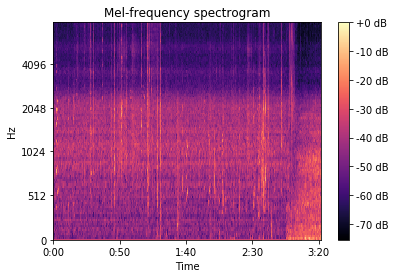

In [38]:
get_wav_info(bucket, files[-1])

[[-0.00213623 -0.00143433]
 [-0.00247192 -0.00177002]
 [-0.00167847 -0.00097656]
 ...
 [ 0.04681396  0.04672241]
 [ 0.04467773  0.04495239]
 [ 0.04141235  0.04226685]]


ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(4849416, 2)

In [4]:
%conda install -c conda-forge librosa

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - librosa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    appdirs-1.4.4              |     pyh9f0ad1d_0          13 KB  conda-forge
    audioread-2.1.9            |   py37h89c1867_0          33 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    ffmpeg-4.2.2               |       h20bf706_0        59.6 MB
    gettext-0.19.8.1           |    h0b5b191_1005         3.6 MB  conda-forge
    gnutls-3.6.13              |       h85f3911_1         2.0 MB  conda-forge
    lame-3.100                 |    h7f98852_1001       